In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data.

In [170]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Forunately, There are no missing values in any of the columns.

In [171]:
data.CarName = data.CarName.apply(lambda x: x.split()[0].lower())
data.CarName.head(20)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
Name: CarName, dtype: object

In [172]:
set(data.CarName)

{'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

here we can see the following are the same car companies with different names. May be typos during data sourcing

- maxda -> **mazda**
- porcshce -> **porsche**
- toyouta -> **toyota**
- vokswagen -> **volkswagen**
- vw -> **volkswagen**

In [173]:
def fix_car_name_typos(car_name):
    if car_name == 'maxda':
        return 'mazda'
    elif car_name == 'porcshce':
        return 'porsche'
    elif car_name == 'toyouta':
        return 'toyota'
    elif car_name == 'vokswagen' or car_name == 'vw':
        return 'volkswagen'
    else:
        return car_name

data.CarName = data.CarName.apply(fix_car_name_typos)
set(data.CarName)

{'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo'}

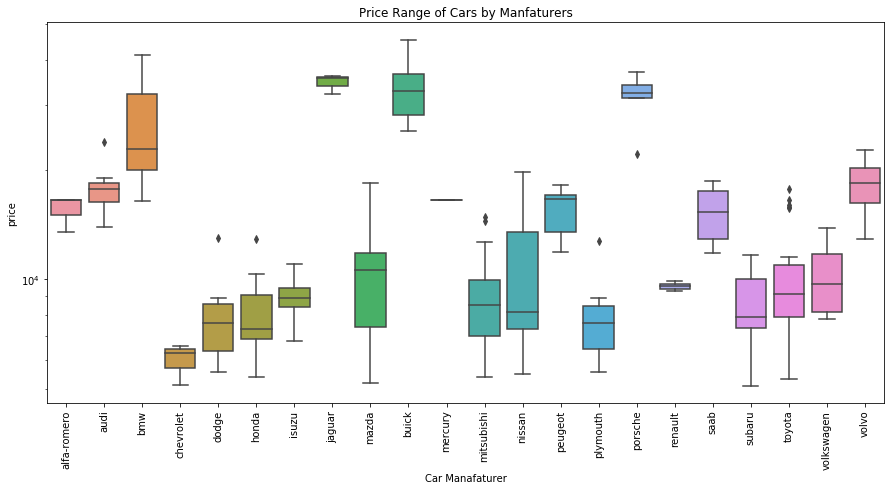

In [174]:
plt.figure(figsize=(15, 7))
a = sns.boxplot(x='CarName', y='price', data=data)
a.set(title='Price Range of Cars by Manfaturers', xlabel='Car Manafaturer')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**The manafaturer of the car has definitely a high impact on the pricing**

* **Jaguar** has the highest median pricing of the whole cars but **Buick** has its whisker above all.
* **Chevorlet** produces cars with least median pricing among all

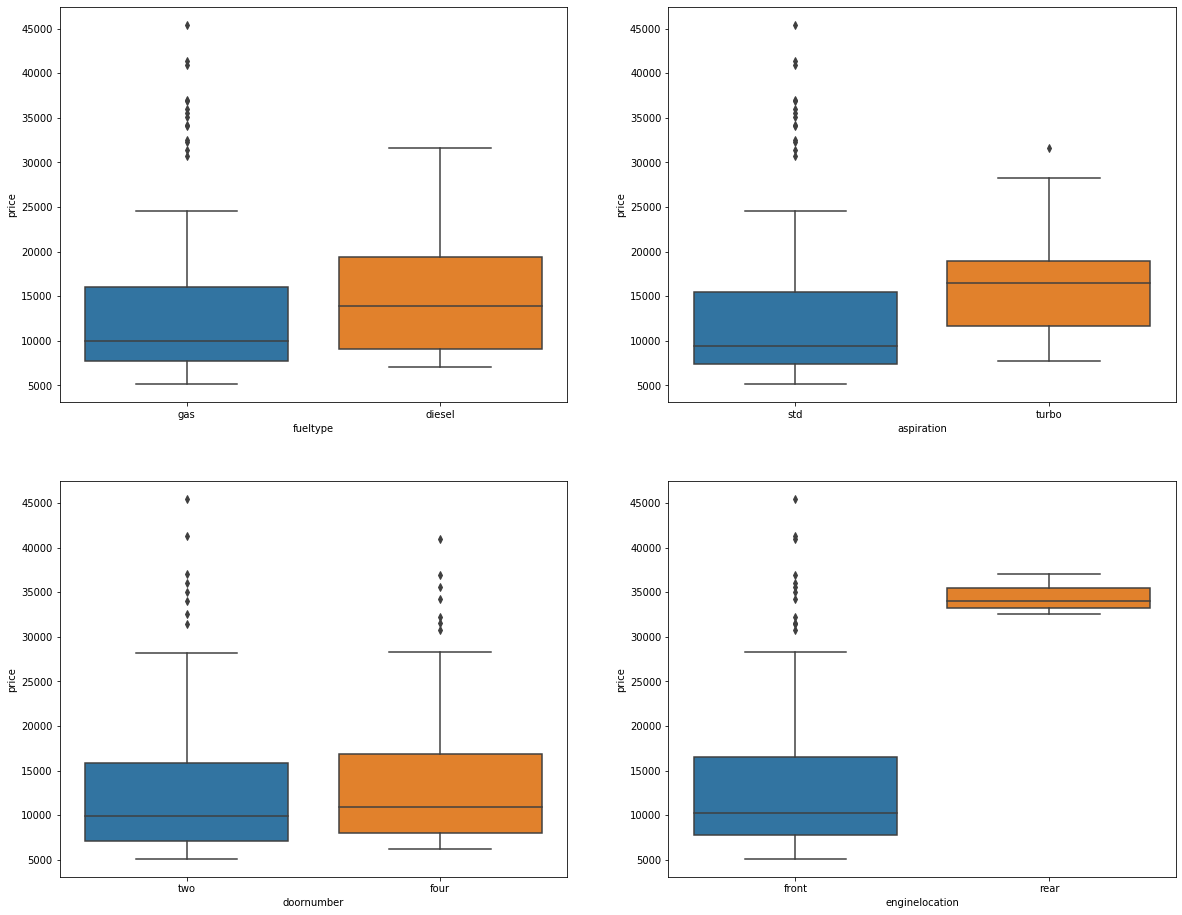

In [175]:
fig, ax = plt.subplots(2,2, figsize=(20, 16))
a = sns.boxplot(x='fueltype', y='price', data=data, ax=ax[0][0])
b = sns.boxplot(x='aspiration', y='price', data=data, ax=ax[0][1])
c = sns.boxplot(x='doornumber', y='price', data=data, ax=ax[1][0])
d = sns.boxplot(x='enginelocation', y='price', data=data, ax=ax[1][1])
plt.show()

Here we can see that,
 * Cars that runs on diesel are more priced than those which run on gas.
 * Cars that has a turbo aspiration is priced higher than the cars with standard aspiration
 * The number of doors a car has does not affect it's pricing much.
 * The Cars whose engines are located in the rear are tremendously expensive than those cars with engines located in the front.
 

Plotting price against the rest of the categorical variables

* symboling
* carbody
* drivewheel
* enginetype
* cylindernumber
* fuelsystem
 

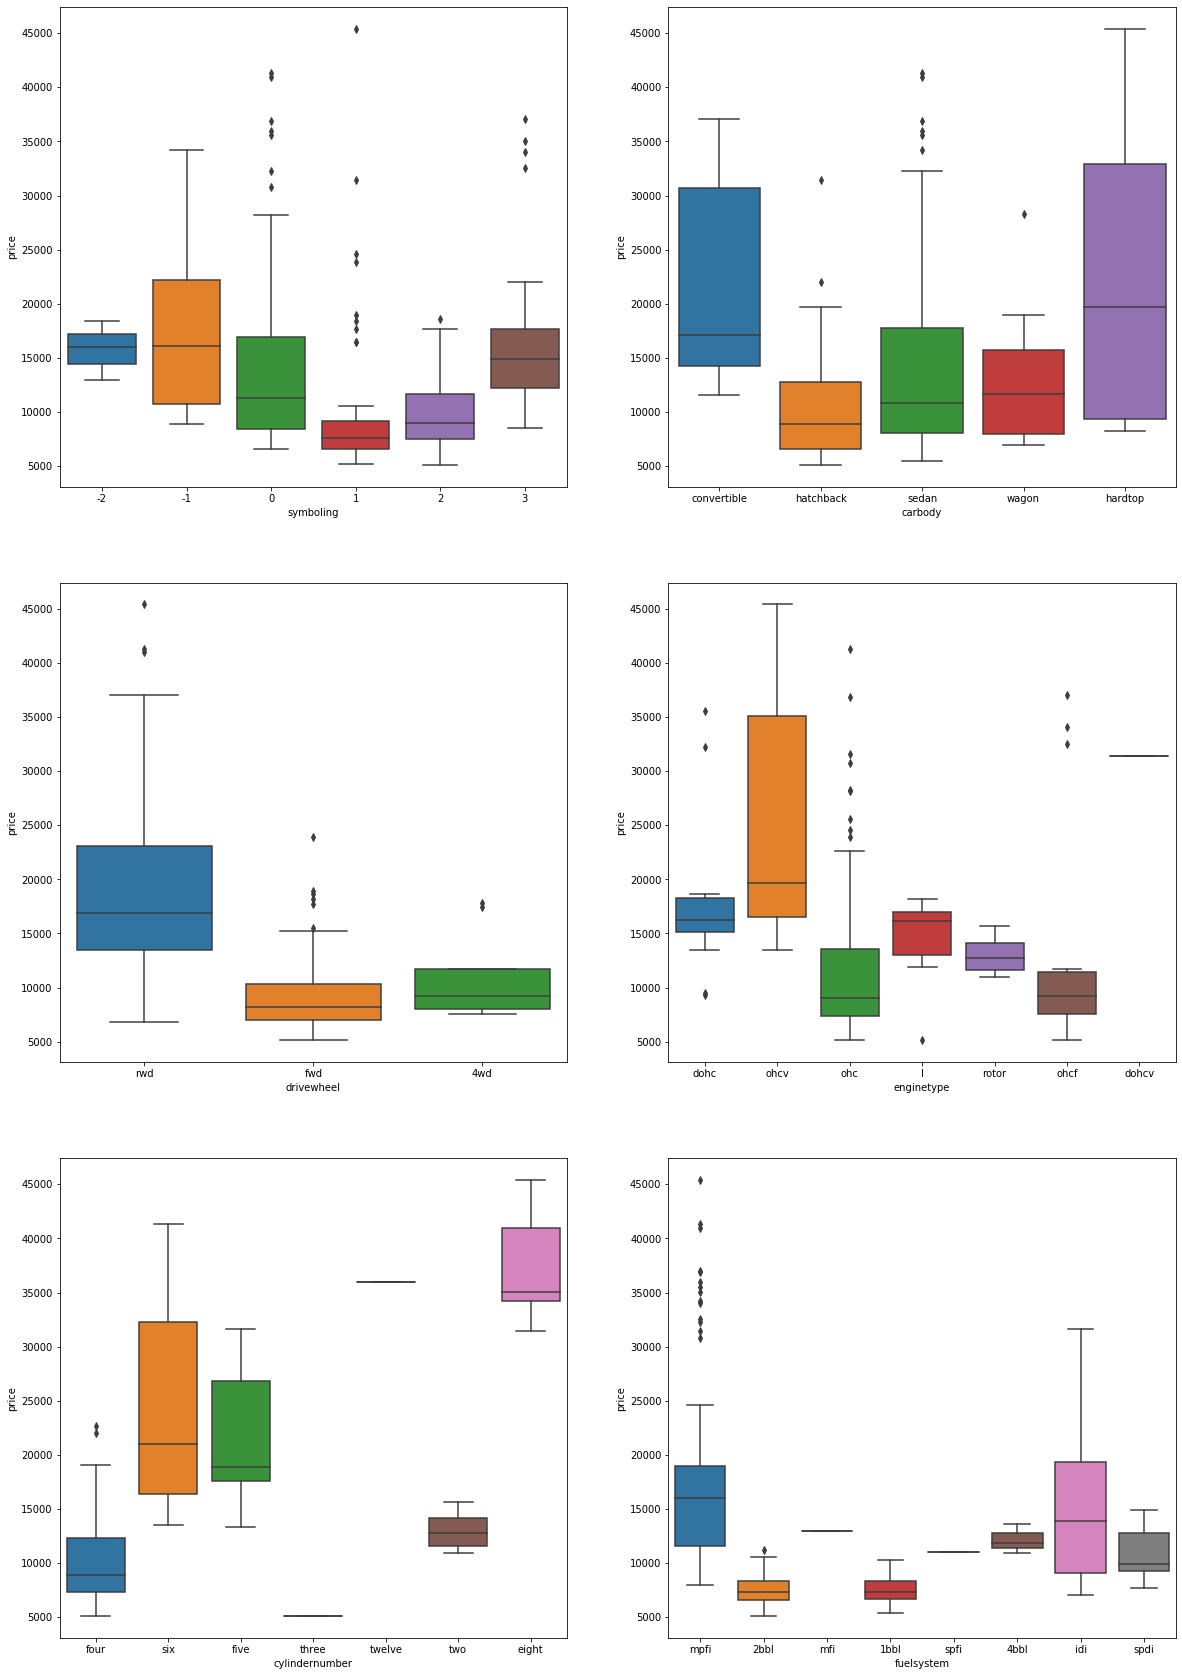

In [176]:
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
a = sns.boxplot(x='symboling', y='price', data=data, ax=ax[0][0])
b = sns.boxplot(x='carbody', y='price', data=data, ax=ax[0][1])
c = sns.boxplot(x='drivewheel', y='price', data=data, ax=ax[1][0])
d = sns.boxplot(x='enginetype', y='price', data=data, ax=ax[1][1])
e = sns.boxplot(x='cylindernumber', y='price', data=data, ax=ax[2][0])
f = sns.boxplot(x='fuelsystem', y='price', data=data, ax=ax[2][1])
plt.show()

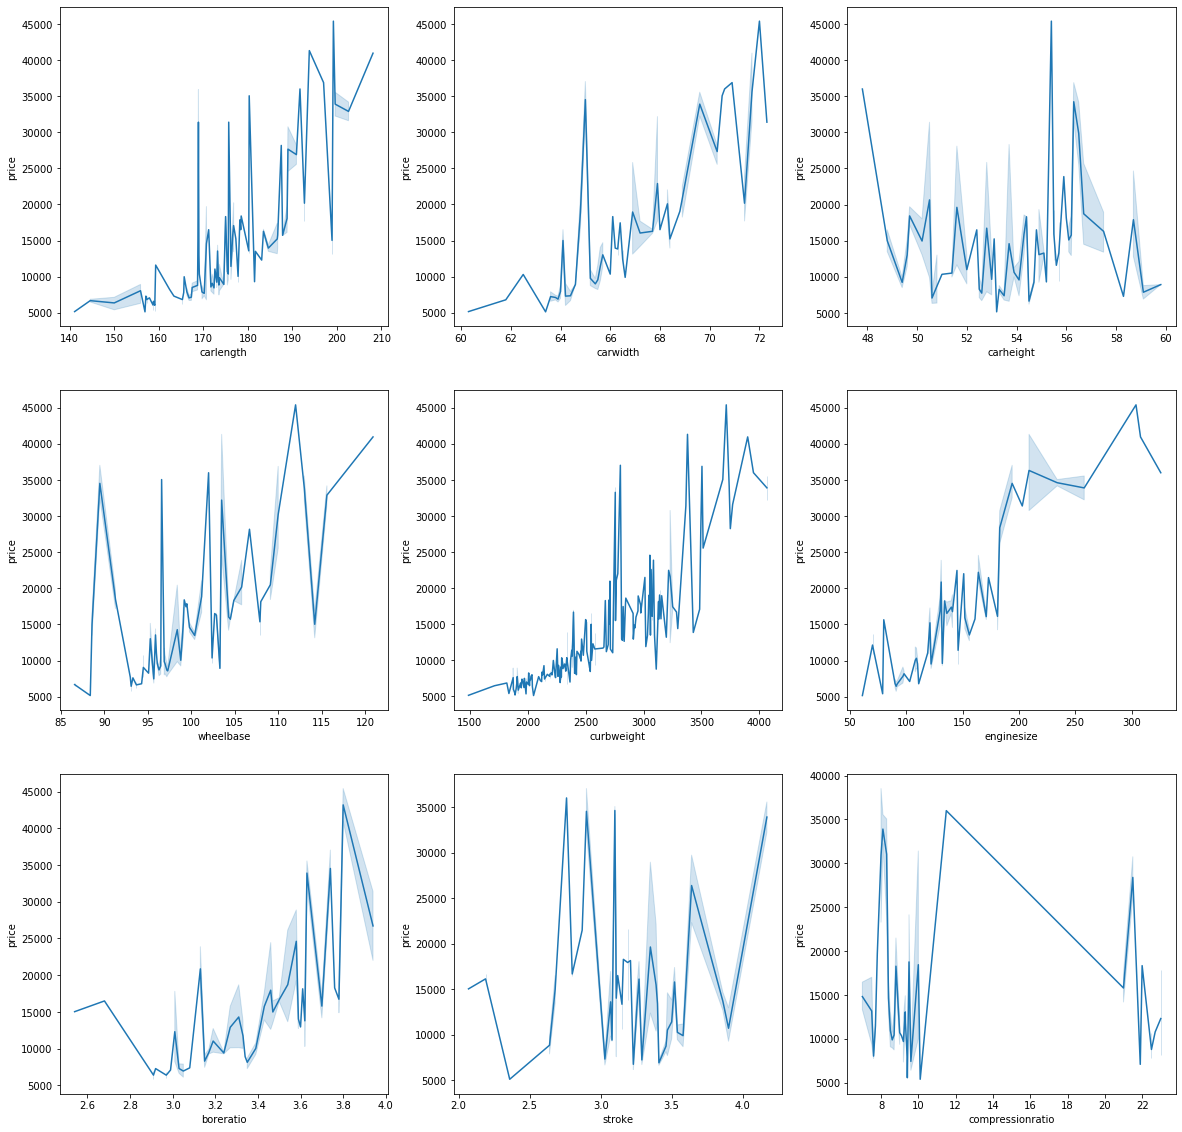

In [177]:
# carlength           
# carwidth            
# carheight           
# wheelbase
# curbweight          
# enginesize           
# boreratio           
# stroke              
# compressionratio       

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
a = sns.lineplot(x='carlength', y='price', data=data, ax=ax[0][0])
b = sns.lineplot(x='carwidth', y='price', data=data, ax=ax[0][1])
c = sns.lineplot(x='carheight', y='price', data=data, ax=ax[0][2])
d = sns.lineplot(x='wheelbase', y='price', data=data, ax=ax[1][0])
e = sns.lineplot(x='curbweight', y='price', data=data, ax=ax[1][1])
f = sns.lineplot(x='enginesize', y='price', data=data, ax=ax[1][2])
g = sns.lineplot(x='boreratio', y='price', data=data, ax=ax[2][0])
h = sns.lineplot(x='stroke', y='price', data=data, ax=ax[2][1])
i = sns.lineplot(x='compressionratio', y='price', data=data, ax=ax[2][2])
plt.show()

The price seems to have a positive correlation with the following numeric attributes.
* `carlength`
* `carwidth`
* `wheelbase` (Even though the variance is quite high)
* `curbwight`
* `enginesize`
* `boreratio`

Another thing which was found during this univariate analysis is that there are NO cars with `compressionratio` between 12 and 20

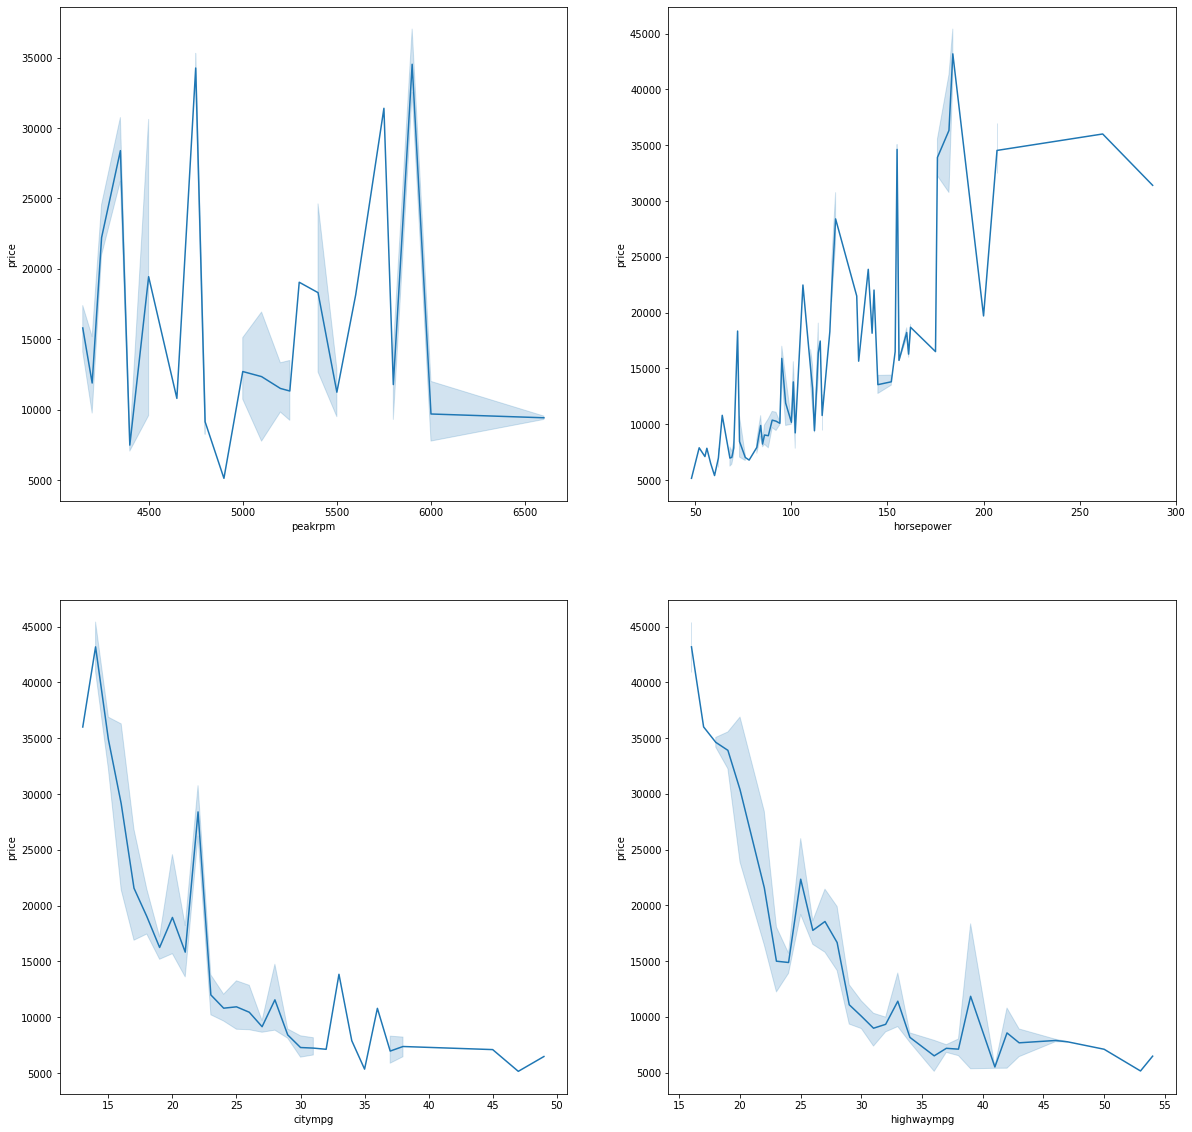

In [178]:
# peakrpm   
# horsepower                    
# citympg             
# highwaympg     

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
a = sns.lineplot(x='peakrpm', y='price', data=data, ax=ax[0][0])
b = sns.lineplot(x='horsepower', y='price', data=data, ax=ax[0][1])
c = sns.lineplot(x='citympg', y='price', data=data, ax=ax[1][0])
d = sns.lineplot(x='highwaympg', y='price', data=data, ax=ax[1][1])

The `horesepower` attribute has a **positive correlation** with the car pricing where as the `citympg` and `highwaympg` attributes have a **negative correlation** with the car pricing

Now let's plot and have a look at how some derived variables affect pricing

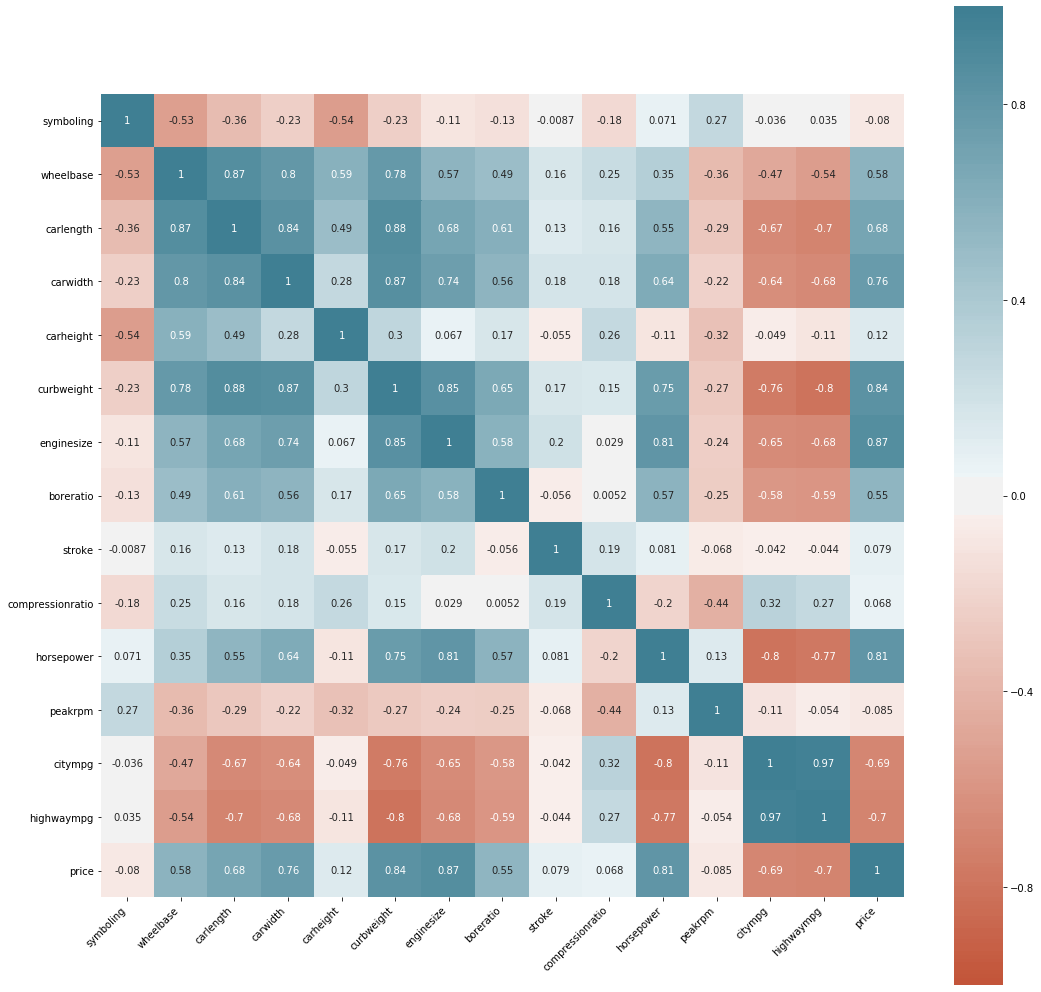

In [179]:
data.pop('car_ID')
corr_matrix = data_n.corr()
plt.subplots(figsize=(18, 18))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_ylim(15, 0)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

From the above heatmap. It is visible that car `price` is correlated with: (from positive to negative correlation)
1. `enginesize`
2. `curbweight`
3. `horsepower`
4. `carwidth`
5. `carlength`
6. `wheelbase`
7. `boreratio`
8. `carheight`
9. `stroke`
10. `compressionratio`
11. `symboling`
12. `peakrpm`
13. `citympg`
14. `highwaympg`

In [180]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [181]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [182]:
data.doornumber.unique()

array(['two', 'four'], dtype=object)

In [183]:
data.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [184]:
data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [185]:
data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [186]:
data.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [187]:
data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [188]:
data.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [189]:
data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [190]:
data.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

We can use simple apply method to replace all the binary categorical variables with 0 or 1.

- fueltype
- aspiration
- doornumber
- enginelocation

In [191]:
data.fueltype = data.fueltype.apply(lambda x: 0 if x == 'gas' else 1)
data.aspiration = data.aspiration.apply(lambda x: 0 if x == 'std' else 1)
data.doornumber = data.doornumber.apply(lambda x: 0 if x == 'four' else 1)
data.enginelocation = data.enginelocation.apply(lambda x: 0 if x == 'front' else 1)

Dummies for other categorical variables

- CarName
- carbody
- drivewheel
- enginetype
- cylindernumber
- fuelsystem

I choose to treat the `symboling` categorical variable as a numerical variable since it is a ordered and numerical anyway.

In [192]:
dummy_carname = pd.get_dummies(data['CarName'])
dummy_carbody = pd.get_dummies(data['carbody'])
dummy_drivewheel = pd.get_dummies(data['drivewheel'])
dummy_enginetype = pd.get_dummies(data['enginetype'])
dummy_cylindernumber = pd.get_dummies(data['cylindernumber'], prefix='n_cyl')
dummy_fuelsystem = pd.get_dummies(data['fuelsystem'])

# instead of dropping every first column, I choose to drop specific columns based on just gut feeling of importance.
# mercury from dummy_carname
# hatchback from dummy_carbody
# 4wd from dummy_drivewheel
# dohcv from dummy_enginetype
# n_cyl_three from dummy_cylindernumber
# spfi from dummy_fuelsystem


# dropping
dummy_carname.pop('mercury')
dummy_carbody.pop('hatchback')
dummy_drivewheel.pop('4wd')
dummy_enginetype.pop('dohcv')
dummy_cylindernumber.pop('n_cyl_three')
dummy_fuelsystem.pop('spfi')

# concatenating all the dummy dataframes to our main dataframe and create a new master dataframe
master = pd.concat([data, dummy_carname, dummy_carbody, dummy_drivewheel, dummy_enginetype,
          dummy_cylindernumber, dummy_fuelsystem], axis=1)
master.columns

# since we've added dummy variables for all categorical variables listed above, we don't need them in our dataset anymore. 
# so we can pop them off our master dataframe.

master.pop('CarName')
master.pop('carbody')
master.pop('drivewheel')
master.pop('enginetype')
master.pop('cylindernumber')
master.pop('fuelsystem')

master.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'alfa-romero', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'convertible', 'hardtop', 'sedan', 'wagon', 'fwd', 'rwd', 'dohc', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'n_cyl_eight', 'n_cyl_five',
       'n_cyl_four', 'n_cyl_six', 'n_cyl_twelve', 'n_cyl_two', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi'],
      dtype='object')

## Train Test Split

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [249]:
train_data, test_data = train_test_split(master, test_size=0.25, random_state=69)
train_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,n_cyl_six,n_cyl_twelve,n_cyl_two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
196,-2,0,0,0,0,104.3,188.8,67.2,56.2,2935,...,0,0,0,0,0,0,0,0,1,0
52,1,0,0,1,0,93.1,159.1,64.2,54.1,1905,...,0,0,0,0,1,0,0,0,0,0
101,0,0,0,0,0,100.4,181.7,66.5,55.1,3095,...,1,0,0,0,0,0,0,0,1,0
73,0,0,0,0,0,120.9,208.1,71.7,56.7,3900,...,0,0,0,0,0,0,0,0,1,0
70,-1,1,1,0,0,115.6,202.6,71.7,56.3,3770,...,0,0,0,0,0,0,1,0,0,0


In [250]:
scaler = MinMaxScaler()
train_data.loc[:, train_data.columns] = scaler.fit_transform(train_data.loc[:, train_data.columns])
train_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,n_cyl_six,n_cyl_twelve,n_cyl_two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
196,0.0,0.0,0.0,0.0,0.0,0.516035,0.711940,0.575000,0.700000,0.561288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
52,0.6,0.0,0.0,1.0,0.0,0.189504,0.268657,0.325000,0.525000,0.161753,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,0.4,0.0,0.0,0.0,0.0,0.402332,0.605970,0.516667,0.608333,0.623351,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
73,0.4,0.0,0.0,0.0,0.0,1.000000,1.000000,0.950000,0.741667,0.935609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70,0.2,1.0,1.0,0.0,0.0,0.845481,0.917910,0.950000,0.708333,0.885182,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [251]:
test_data.loc[:, test_data.columns] = scaler.transform(test_data.loc[:, test_data.columns])
test_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,n_cyl_six,n_cyl_twelve,n_cyl_two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
47,0.4,0.0,0.0,0.0,0.0,0.769679,0.873134,0.775000,0.416667,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68,0.2,1.0,1.0,0.0,0.0,0.682216,0.743284,0.833333,0.908333,0.877424,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
181,0.2,0.0,0.0,0.0,0.0,0.521866,0.697015,0.516667,0.525000,0.645074,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57,1.0,0.0,0.0,1.0,0.0,0.253644,0.416418,0.450000,0.150000,0.347944,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89,0.6,0.0,0.0,1.0,0.0,0.230321,0.361194,0.291667,0.558333,0.155547,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [252]:
y_train = train_data.pop('price')
X_train = train_data
X_train = sm.add_constant(X_train)

In [253]:
lr_model = sm.OLS(y_train, X_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     51.25
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           2.07e-51
Time:                        00:37:56   Log-Likelihood:                 294.49
No. Observations:                 153   AIC:                            -469.0
Df Residuals:                      93   BIC:                            -287.2
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3014      0.190     -1.586      0.116      -0.679       0.076
symboling           -0.0320      0.042     -0.770      0.443      -0.114       0.050
fueltype             0.1046      0.118      0.888      0.377      -0.129       0.339
aspiration           0.0206      0.030      0.697      0.488      -0.038       0.079
doornumber          -0.0049      0.014     -0.338      0.736      -0.033       0.024
enginelocation       0.2319      0.058      4.025      0.000       0.117       0.346
wheelbase            0.1747      0.095      1.835      0.070      -0.014       0.364
carlength           -0.2723      0.114     -2.390      0.019      -0.499      -0.046
carwidth             0.1600      0.084      1.897      0.061      -0.007       0.327
carheight           -0.0827      0.055     -1.502      0.137      -0.192       0.027
curbweight           0.5868      0.183      3.210      0.002       0.224       0.950
enginesize           0.5520      0.217      2.546      0.013       0.121       0.983
boreratio           -0.1565      0.081     -1.930      0.057      -0.318       0.005
stroke              -0.0469      0.060     -0.776      0.440      -0.167       0.073
compressionratio    -0.2353      0.262     -0.900      0.371      -0.755       0.284
horsepower           0.1273      0.211      0.603      0.548      -0.292       0.547
peakrpm              0.1267      0.052      2.431      0.017       0.023       0.230
citympg             -0.0108      0.154     -0.070      0.944      -0.316       0.295
highwaympg           0.1367      0.139      0.985      0.327      -0.139       0.412
alfa-romero          0.1089      0.088      1.241      0.218      -0.065       0.283
audi                 0.1096      0.075      1.463      0.147      -0.039       0.258
bmw                  0.2397      0.066      3.656      0.000       0.110       0.370
buick                0.1564      0.082      1.909      0.059      -0.006       0.319
chevrolet           -0.0099      0.082     -0.121      0.904      -0.172       0.152
dodge               -0.0384      0.076     -0.504      0.615      -0.190       0.113
honda                0.0198      0.078      0.254      0.800      -0.135       0.175
isuzu                0.0256      0.079      0.323      0.748      -0.132       0.183
jaguar               0.0508      0.122      0.417      0.677      -0.191       0.292
mazda                0.0522      0.065      0.797      0.428      -0.078       0.182
mitsubishi          -0.0361      0.076     -0.472      0.638      -0.188       0.116
nissan               0.0504      0.069      0.728      0.468      -0.087       0.188
peugeot             -0.0552      0.130     -0.425      0.672      -0.313       0.203
plymouth            -0.0350      0.076     -0.459      0.647      -0.186       0.116
porsche              0.

In [258]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 25)
rfe =rfe.fit(X_train, y_train)
rfe_list = sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x: x[2])

rfe_list

[('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('horsepower', True, 1),
 ('highwaympg', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('jaguar', True, 1),
 ('porsche', True, 1),
 ('dohc', True, 1),
 ('l', True, 1),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('n_cyl_five', True, 1),
 ('n_cyl_four', True, 1),
 ('n_cyl_six', True, 1),
 ('n_cyl_twelve', True, 1),
 ('n_cyl_two', True, 1),
 ('4bbl', True, 1),
 ('convertible', False, 2),
 ('subaru', False, 3),
 ('audi', False, 4),
 ('carlength', False, 5),
 ('peakrpm', False, 6),
 ('alfa-romero', False, 7),
 ('mazda', False, 8),
 ('nissan', False, 9),
 ('isuzu', False, 10),
 ('saab', False, 11),
 ('symboling', False, 12),
 ('volkswagen', False, 13),
 ('carheight', False, 14),
 ('toyota', False, 15),
 ('volvo', False, 16),
 ('compressionratio', False, 17),
 ('renault', Fa

In [259]:
lr_model = sm.OLS(y_train, X_train[[c[0]for c in rfe_list if c[1]]]).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              220.7
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                    1.17e-92
Time:                        00:41:01   Log-Likelihood:                          254.56
No. Observations:                 153   AIC:                                     -463.1
Df Residuals:                     130   BIC:                                     -393.4
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.3386      0.070      4.825      0.000       0.200       0.477
wheelbase          0.0119      0.055      0.214      0.831      -0.098       0.122
carwidth           0.1678      0.069      2.419      0.017       0.031       0.305
curbweight         0.3385      0.091      3.708      0.000       0.158       0.519
enginesize         0.3481      0.124      2.807      0.006       0.103       0.593
boreratio         -0.1067      0.045     -2.384      0.019      -0.195      -0.018
stroke            -0.1067      0.040     -2.654      0.009      -0.186      -0.027
horsepower         0.1607      0.069      2.336      0.021       0.025       0.297
highwaympg         0.0261      0.040      0.648      0.518      -0.054       0.106
bmw                0.2304      0.035      6.527      0.000       0.161       0.300
buick              0.1341      0.041      3.271      0.001       0.053       0.215
jaguar             0.1588      0.067      2.356      0.020       0.025       0.292
porsche            0.0988      0.051      1.942      0.054      -0.002       0.199
dohc               0.1148      0.054      2.129      0.035       0.008       0.221
l                  0.0721      0.052      1.380      0.170      -0.031       0.176
ohc                0.1109      0.052      2.149      0.033       0.009       0.213
ohcf               0.0802      0.052      1.554      0.123      -0.022       0.182
ohcv               0.0215      0.051      0.424      0.672      -0.079       0.122
rotor              0.0095      0.018      0.533      0.595      -0.026       0.045
n_cyl_five        -0.1480      0.046     -3.206      0.002      -0.239      -0.057
n_cyl_four        -0.1648      0.045     -3.690      0.000      -0.253      -0.076
n_cyl_six         -0.1526      0.043     -3.518      0.001      -0.238      -0.067
n_cyl_twelve      -0.2671      0.097     -2.765      0.007      -0.458      -0.076
n_cyl_two          0.0095      0.018      0.533      0.595      -0.026       0.045
4bbl               0.0095      0.018      0.533      0.595      -0.026       0.045
==============================================================================
Omnibus:                       35.926   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.570
Skew:                           0.977   Prob(JB):                     4.32e-19
Kurtosis:                       6.074   Cond. No.                     2.82e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.27e-33. This might indicate that there are
strong 

In [257]:
lr_model = sm.OLS(y_train, X_train[[c[0] for c in rfe_list[:15]]]).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              291.1
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                    1.98e-96
Time:                        00:40:22   Log-Likelihood:                          238.92
No. Observations:                 153   AIC:                                     -447.8
Df Residuals:                     138   BIC:                                     -402.4
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.4510      0.057      7.980      0.000       0.339       0.563
carwidth           0.2201      0.060      3.694      0.000       0.102       0.338
curbweight         0.3089      0.069      4.462      0.000       0.172       0.446
horsepower         0.2199      0.057      3.850      0.000       0.107       0.333
bmw                0.2431      0.034      7.149      0.000       0.176       0.310
buick              0.2160      0.033      6.607      0.000       0.151       0.281
jaguar             0.2035      0.066      3.081      0.002       0.073       0.334
n_cyl_five        -0.1804      0.041     -4.361      0.000      -0.262      -0.099
n_cyl_four        -0.1859      0.035     -5.287      0.000      -0.255      -0.116
n_cyl_twelve      -0.1169      0.088     -1.335      0.184      -0.290       0.056
n_cyl_six         -0.1279      0.028     -4.538      0.000      -0.184      -0.072
dohc               0.0830      0.038      2.165      0.032       0.007       0.159
ohc                0.0758      0.033      2.272      0.025       0.010       0.142
ohcf               0.0453      0.038      1.202      0.231      -0.029       0.120
l                  0.0430      0.037      1.157      0.249      -0.030       0.116
==============================================================================
Omnibus:                       35.361   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.721
Skew:                           0.991   Prob(JB):                     1.33e-17
Kurtosis:                       5.875   Cond. No.                         33.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""